一个财富分配游戏：

房间里有100个人，每人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100个人的财富分布是怎样的？

# 1.财富分配模型


模型假设：
1. 每个人初始基金100元
2. 从18岁到65岁，每天玩一次，简化运算按照一共玩17000轮
3. 每天拿出一元钱，并且随机分配给另一个人
4. 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams["axes.unicode_minus"] = False

In [77]:
# 构造初始数据集：100个玩家，每个人都有100元初始资金
players_num = 100
players = range(1, players_num+1)  # 玩家编号
df = pd.DataFrame({
    'player': players,
    'money': [100] * players_num
})

df.head()

,player,money
0,1,100
1,2,100
2,3,100
3,4,100
4,5,100


<BarContainer object of 100 artists>

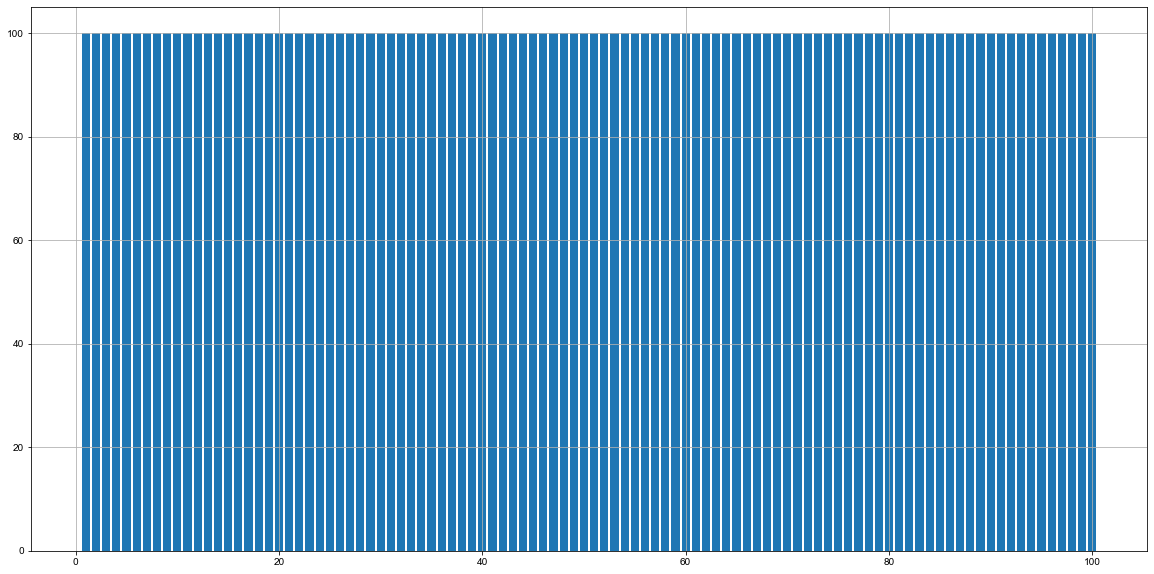

In [78]:
# 开始游戏前的财富分配情况
plt.figure(figsize=(20, 10))
plt.grid()
plt.bar(df['player'], df['money'])

In [79]:
result = []  # 存储每次分配结果
total_round = 17000  # 总共轮次

# 保存还未开始游戏时每个玩家的的财富
result.append([0] + df['money'].to_list())

for round in range(1, total_round+1):
    # 幸运鹅数量
    lucky_guys_num = len(df[df['money'] > 0])
    # 每个人的财富都减1（除非没钱了）
    df['money'] = df['money'].apply(lambda x: x-1 if x > 0 else 0)
    # 计算每个人增加的金额
    lucky_guys = np.random.choice(players, size=lucky_guys_num)  # 有多少个人-1，就抽取多少次
    lucky_guys_bonus = Counter(lucky_guys)  # 幸运鹅对应的奖励金额
    df['money'] = df.apply(lambda row: lucky_guys_bonus.get(row['player'], 0) + row['money'], axis=1)
    result.append([round] + df['money'].to_list())  # 轮次以及每个玩家的财富
    print(f'Round {round}')

Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 30
Round 31
Round 32
Round 33
Round 34
Round 35
Round 36
Round 37
Round 38
Round 39
Round 40
Round 41
Round 42
Round 43
Round 44
Round 45
Round 46
Round 47
Round 48
Round 49
Round 50
Round 51
Round 52
Round 53
Round 54
Round 55
Round 56
Round 57
Round 58
Round 59
Round 60
Round 61
Round 62
Round 63
Round 64
Round 65
Round 66
Round 67
Round 68
Round 69
Round 70
Round 71
Round 72
Round 73
Round 74
Round 75
Round 76
Round 77
Round 78
Round 79
Round 80
Round 81
Round 82
Round 83
Round 84
Round 85
Round 86
Round 87
Round 88
Round 89
Round 90
Round 91
Round 92
Round 93
Round 94
Round 95
Round 96
Round 97
Round 98
Round 99
Round 100
Round 101
Round 102
Round 103
Round 104
Round 105
Round 106
Round 107
Round 108
Round 109
Round 110
Round 11

In [5]:
# 所有财富分配的结果
result_df = pd.DataFrame(result, columns=["round"] + list(players))
result_df.head()

,round,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,1,99,99,99,100,100,102,101,100,99,...,101,101,99,99,100,99,100,100,102,99
2,2,98,99,98,100,99,103,104,101,100,...,100,100,100,100,100,99,99,100,102,99
3,3,98,99,98,101,99,103,106,100,100,...,99,99,99,100,100,98,98,101,101,100
4,4,98,98,99,101,99,103,105,99,99,...,98,98,99,102,99,98,97,102,101,99


<BarContainer object of 100 artists>

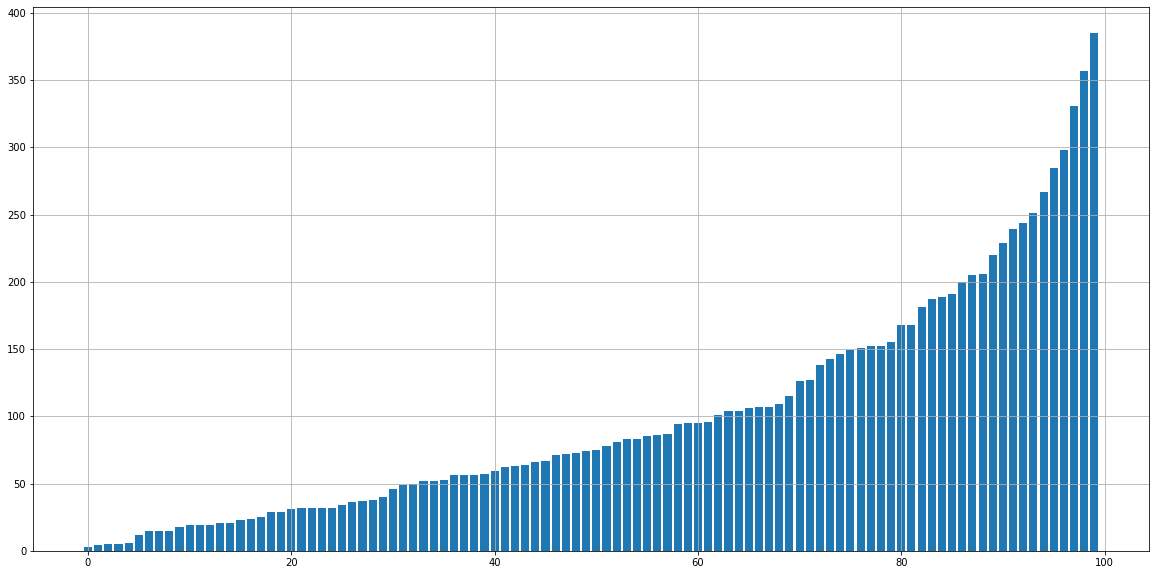

In [6]:
# 指定查看第几轮的分配结果
round = 17000
show_df = result_df[result_df['round'] == round][players].iloc[0]

# 按照财富从小到大排序
show_df.sort_values(ascending=True, inplace=True)  
show_df.reset_index(drop=True, inplace=True)

# 财富分配情况
plt.figure(figsize=(20, 10))
plt.grid()
plt.bar(show_df.index, show_df.values)
plt.savefig('test1.jpg', dpi=400)

Round: 0
Round: 0
Round: 100
Round: 200
Round: 300
Round: 400
Round: 500
Round: 600
Round: 700
Round: 800
Round: 900
Round: 1000
Round: 1100
Round: 1200
Round: 1300
Round: 1400
Round: 1500
Round: 1600
Round: 1700
Round: 1800
Round: 1900
Round: 2000
Round: 2100
Round: 2200
Round: 2300
Round: 2400
Round: 2500
Round: 2600
Round: 2700
Round: 2800
Round: 2900
Round: 3000
Round: 3100
Round: 3200
Round: 3300
Round: 3400
Round: 3500
Round: 3600
Round: 3700
Round: 3800
Round: 3900
Round: 4000
Round: 4100
Round: 4200
Round: 4300
Round: 4400
Round: 4500
Round: 4600
Round: 4700
Round: 4800
Round: 4900
Round: 5000
Round: 5100
Round: 5200
Round: 5300
Round: 5400
Round: 5500
Round: 5600
Round: 5700
Round: 5800
Round: 5900
Round: 6000
Round: 6100
Round: 6200
Round: 6300
Round: 6400
Round: 6500
Round: 6600
Round: 6700
Round: 6800
Round: 6900
Round: 7000
Round: 7100
Round: 7200
Round: 7300
Round: 7400
Round: 7500
Round: 7600
Round: 7700
Round: 7800
Round: 7900
Round: 8000
Round: 8100
Round: 8200
Round: 

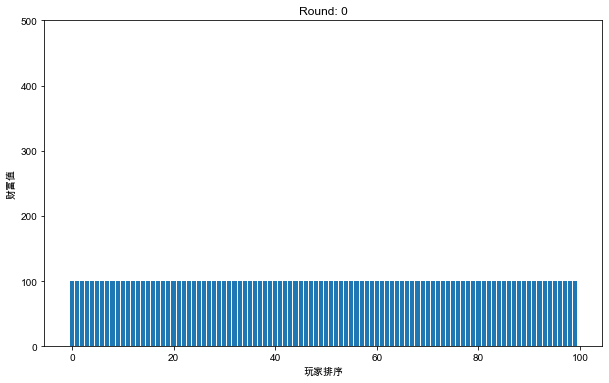

In [70]:
# 动态查看每一轮游戏之后的财富分布变化
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize = (10, 6))

def draw_bar(r):
    ax.clear()
    print(f"Round: {r}")
    plt.title(f"Round: {r}")
    plt.ylim(0, 500)
    plt.xlabel('玩家排序')
    plt.ylabel('财富值')
    show_df = result_df[result_df['round'] == r][players].iloc[0]

    # 按照财富从小到大排序
    show_df.sort_values(ascending=True, inplace=True)  
    show_df.reset_index(drop=True, inplace=True)
    plt.bar(show_df.index, show_df.values)

ani = FuncAnimation(fig, draw_bar, frames=range(0, round, 100))  # 创建动画效果
# fps=5, 每秒播放5帧，数字越大，帧率越高，播放速度越快
ani.save('test1.gif', writer='imagemagick', fps=10, dpi=100)


In [31]:
# 基尼系数计算的函数
def gini_coef(wealths):
    cum_wealths = np.cumsum(sorted(np.append(wealths, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / np.float(len(cum_wealths)-1)
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A+B)

In [32]:
# 计算每一轮结束后的基尼系数
gini_list = [gini_coef(item[list(players)]) for i, item in result_df.iterrows()]

/Users/xuzhanhong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


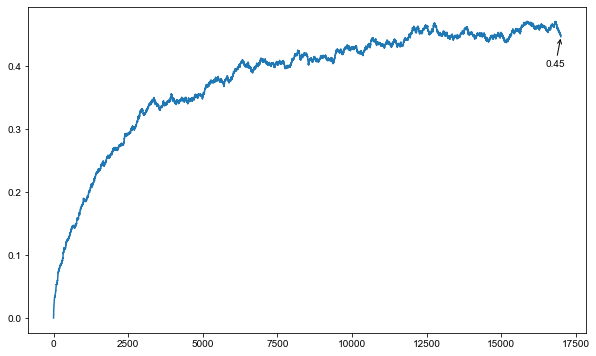

In [63]:
# 基尼系数的变化曲线
fig = plt.figure(figsize=(10, 6))
plt.plot(gini_list)

plt.annotate(
    "%.2f" % gini_list[-1],
    xy=(len(gini_list)+1, gini_list[-1]),
    xytext=(16500, 0.4),
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

plt.savefig('gini1.jpg', dpi=400)

结论：
极少数人掌握了大多数的财富，贫富悬殊。

# 2.在允许借贷情况下，研究以下问题

1. 和初始模型的区别：允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
2. 玩家从18岁开始，在经过17年后为35岁，这个期间共进行游戏6200次左右，则此刻查看财富情况，将财富值为负的标记成“破产”，研究该类玩家在今后的游戏中能否成功“逆袭”（财富值从负到正为逆袭）

In [71]:
# 构造初始数据集：100个玩家，每个人都有100元初始资金
players_num = 100
players = range(1, players_num+1)  # 玩家编号
df = pd.DataFrame({
    'player': players,
    'money': [100] * players_num
})

In [72]:
result = []  # 存储每次分配结果
total_round = 17000  # 总共轮次

# 保存还未开始游戏时每个玩家的的财富
result.append([0] + df['money'].to_list())

for round in range(1, total_round+1):
    # 幸运鹅数量
    lucky_guys_num = players_num
    # 每个人的财富都减1
    df['money'] = df['money'].apply(lambda x: x-1)
    # 计算每个人增加的金额
    lucky_guys = np.random.choice(players, size=lucky_guys_num)  # 有多少个人-1，就抽取多少次
    lucky_guys_bonus = Counter(lucky_guys)  # 幸运鹅对应的奖励金额
    df['money'] = df.apply(lambda row: lucky_guys_bonus.get(row['player'], 0) + row['money'], axis=1)
    result.append([round] + df['money'].to_list())  # 轮次以及每个玩家的财富
    print(f'Round {round}')

Roound 1
Roound 2
Roound 3
Roound 4
Roound 5
Roound 6
Roound 7
Roound 8
Roound 9
Roound 10
Roound 11
Roound 12
Roound 13
Roound 14
Roound 15
Roound 16
Roound 17
Roound 18
Roound 19
Roound 20
Roound 21
Roound 22
Roound 23
Roound 24
Roound 25
Roound 26
Roound 27
Roound 28
Roound 29
Roound 30
Roound 31
Roound 32
Roound 33
Roound 34
Roound 35
Roound 36
Roound 37
Roound 38
Roound 39
Roound 40
Roound 41
Roound 42
Roound 43
Roound 44
Roound 45
Roound 46
Roound 47
Roound 48
Roound 49
Roound 50
Roound 51
Roound 52
Roound 53
Roound 54
Roound 55
Roound 56
Roound 57
Roound 58
Roound 59
Roound 60
Roound 61
Roound 62
Roound 63
Roound 64
Roound 65
Roound 66
Roound 67
Roound 68
Roound 69
Roound 70
Roound 71
Roound 72
Roound 73
Roound 74
Roound 75
Roound 76
Roound 77
Roound 78
Roound 79
Roound 80
Roound 81
Roound 82
Roound 83
Roound 84
Roound 85
Roound 86
Roound 87
Roound 88
Roound 89
Roound 90
Roound 91
Roound 92
Roound 93
Roound 94
Roound 95
Roound 96
Roound 97
Roound 98
Roound 99
Roound 100
Roound 1

In [73]:
# 所有财富分配的结果
result_df = pd.DataFrame(result, columns=["round"] + list(players))
result_df.head()

,round,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,1,101,103,99,102,100,100,100,100,100,...,99,100,100,101,101,100,101,101,99,99
2,2,101,103,99,104,99,99,100,100,101,...,100,100,99,101,100,99,101,104,99,99
3,3,101,102,99,104,101,100,99,102,101,...,100,102,100,100,100,101,102,103,98,99
4,4,102,102,100,104,100,100,99,101,104,...,101,102,99,101,99,100,102,103,97,100


In [74]:
# 6200次时财富为负数的玩家ID
temp_df = result_df[result_df['round'] == 6200].iloc[0]
loser_ids = list(temp_df[temp_df.values < 0].index)
print(f"6200次时财富为负数的玩家ID: {loser_ids}")

6200次时财富为负数的玩家ID: [12, 25, 35, 36, 53, 60, 61, 89, 91, 97, 99]


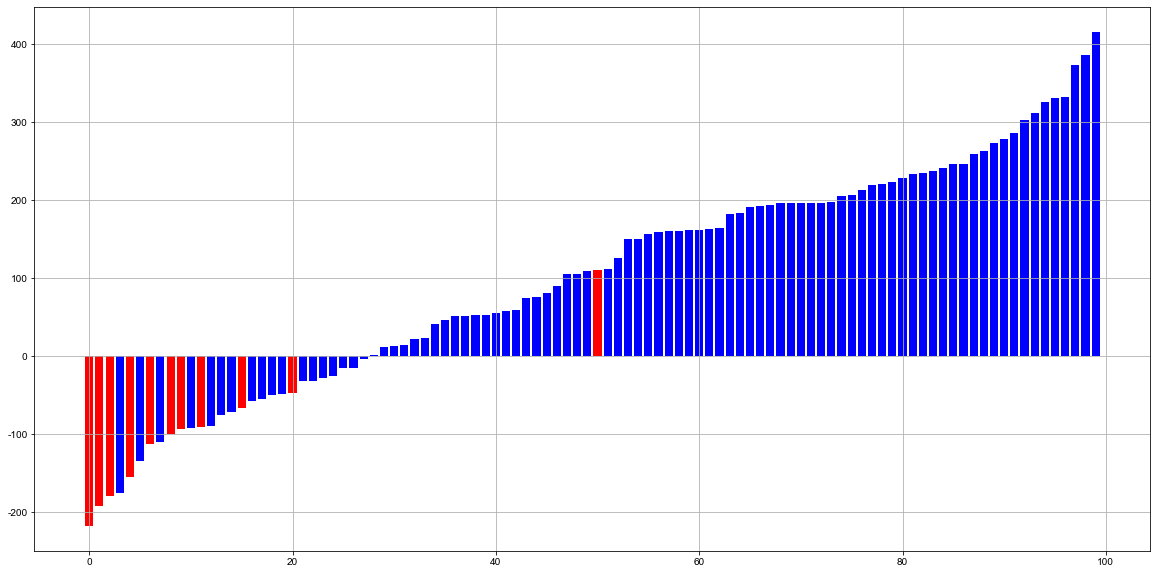

In [76]:
# 指定查看第几轮的分配结果
round = 17000

# 指定轮次结果
round_df = result_df[result_df['round'] == round][players].T.reset_index()
round_df.columns = ['player', 'money']
# 6200次游戏破产时的颜色设置为红色，其他人的颜色为蓝色
round_df['color'] = round_df['player'].apply(lambda x: 'red' if x in loser_ids else 'blue')

# 按照财富从小到大排序
round_df.sort_values(by='money', ascending=True, inplace=True)  
round_df.reset_index(drop=True, inplace=True)

# 财富分配情况
plt.figure(figsize=(20, 10))
plt.grid()
plt.bar(round_df.index, round_df.money, color=round_df.color)
plt.savefig('test2.jpg', dpi=400)

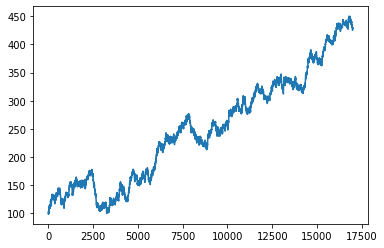

In [37]:
# 看一下排名第一的用户的发家史
max_money = result_df.iloc[-1][list(players)].max()
max_palyer = result_df.iloc[-1][result_df.iloc[-1] == max_money].index[0]
plt.plot(result_df[max_palyer])


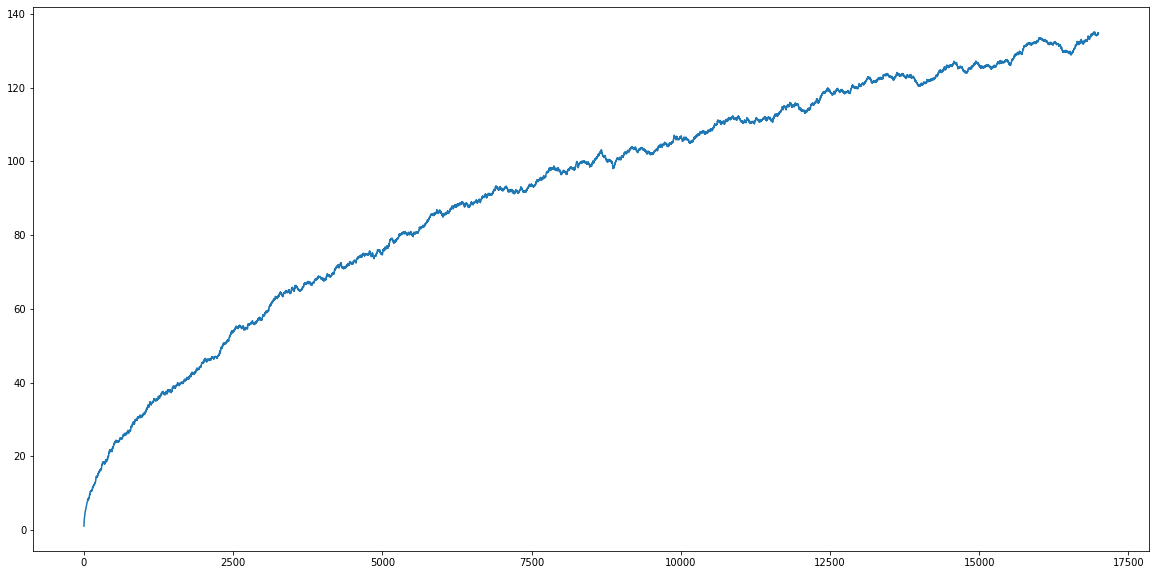

In [42]:
# 财富标准差波动情况
money_std = [item[list(players)].std() for i, item in result_df.iterrows()]

plt.figure(figsize=(20, 10))
plt.plot(money_std)

# 3.努力的人生会更好吗？

1. 每个人初始基金仍为100元
2. 一共玩17000轮
3. 每天拿出一元钱，并且随机分配给另一个人
4. 有10个人加倍努力，从而获得了1%的竞争优势
5. 允许借贷：允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏

In [80]:
# 构造初始数据集：100个玩家，每个人都有100元初始资金
players_num = 100
players = range(1, players_num+1)  # 玩家编号
df = pd.DataFrame({
    'player': players,
    'money': [100] * players_num
})

In [81]:
# 假设更努力的10个人ID为
luckier_players = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

luckier_player_p = 0.01 * 1.01  # 更努力的人的概率
others_player_p = (1 - luckier_player_p * 10) / 90  # 其他人的概率
# 最终的概率列表
player_p = [luckier_player_p if i in luckier_players else others_player_p for i in players]

In [82]:
result = []  # 存储每次分配结果
total_round = 17000  # 总共轮次


# 保存还未开始游戏时每个玩家的的财富
result.append([0] + df['money'].to_list())

for round in range(1, total_round+1):
    # 幸运鹅数量
    lucky_guys_num = players_num
    # 每个人的财富都减1
    df['money'] = df['money'].apply(lambda x: x-1)
    # 计算每个人增加的金额
    lucky_guys = np.random.choice(players, size=lucky_guys_num, p=player_p)  # 有多少个人-1，就抽取多少次，不同用户赋予不同的权重
    lucky_guys_bonus = Counter(lucky_guys)  # 幸运鹅对应的奖励金额
    df['money'] = df.apply(lambda row: lucky_guys_bonus.get(row['player'], 0) + row['money'], axis=1)
    result.append([round] + df['money'].to_list())  # 轮次以及每个玩家的财富
    print(f'Round {round}')

Roound 1
Roound 2
Roound 3
Roound 4
Roound 5
Roound 6
Roound 7
Roound 8
Roound 9
Roound 10
Roound 11
Roound 12
Roound 13
Roound 14
Roound 15
Roound 16
Roound 17
Roound 18
Roound 19
Roound 20
Roound 21
Roound 22
Roound 23
Roound 24
Roound 25
Roound 26
Roound 27
Roound 28
Roound 29
Roound 30
Roound 31
Roound 32
Roound 33
Roound 34
Roound 35
Roound 36
Roound 37
Roound 38
Roound 39
Roound 40
Roound 41
Roound 42
Roound 43
Roound 44
Roound 45
Roound 46
Roound 47
Roound 48
Roound 49
Roound 50
Roound 51
Roound 52
Roound 53
Roound 54
Roound 55
Roound 56
Roound 57
Roound 58
Roound 59
Roound 60
Roound 61
Roound 62
Roound 63
Roound 64
Roound 65
Roound 66
Roound 67
Roound 68
Roound 69
Roound 70
Roound 71
Roound 72
Roound 73
Roound 74
Roound 75
Roound 76
Roound 77
Roound 78
Roound 79
Roound 80
Roound 81
Roound 82
Roound 83
Roound 84
Roound 85
Roound 86
Roound 87
Roound 88
Roound 89
Roound 90
Roound 91
Roound 92
Roound 93
Roound 94
Roound 95
Roound 96
Roound 97
Roound 98
Roound 99
Roound 100
Roound 1

In [84]:
# 所有财富分配的结果
result_df = pd.DataFrame(result, columns=["round"] + list(players))
result_df.head()

,round,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,1,101,100,104,100,99,99,100,99,100,...,101,99,101,99,99,101,100,100,100,99
2,2,101,102,106,99,99,98,102,98,100,...,101,100,100,99,98,101,99,101,99,99
3,3,101,103,106,98,99,98,103,98,100,...,100,99,100,102,98,102,101,101,98,98
4,4,100,102,105,98,102,98,103,97,99,...,100,99,101,102,99,102,101,101,98,98


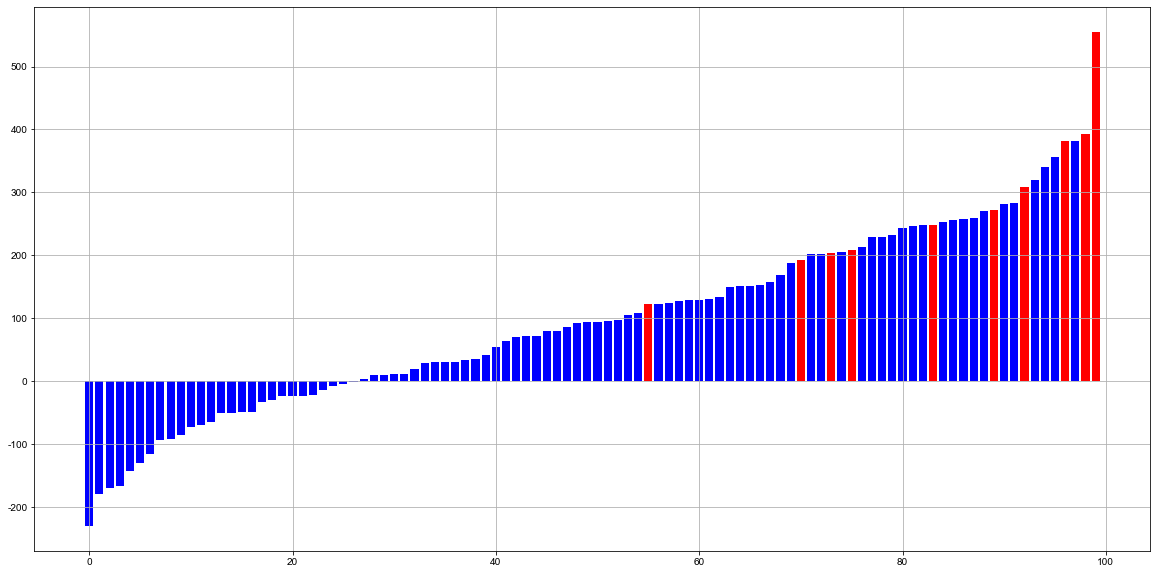

In [86]:
# 指定查看第几轮的分配结果
round = 17000

# 指定轮次结果
round_df = result_df[result_df['round'] == round][players].T.reset_index()
round_df.columns = ['player', 'money']
# 更努力的10个人的颜色设置为红色，其他人的颜色为蓝色
round_df['color'] = round_df['player'].apply(lambda x: 'red' if x in luckier_players else 'blue')

# 按照财富从小到大排序
round_df.sort_values(by='money', ascending=True, inplace=True)  
round_df.reset_index(drop=True, inplace=True)

# 财富分配情况
plt.figure(figsize=(20, 10))
plt.grid()
plt.bar(round_df.index, round_df.money, color=round_df.color)
plt.savefig('test3.jpg', dpi=400)


Round: 0
Round: 0
Round: 100
Round: 200
Round: 300
Round: 400
Round: 500
Round: 600
Round: 700
Round: 800
Round: 900
Round: 1000
Round: 1100
Round: 1200
Round: 1300
Round: 1400
Round: 1500
Round: 1600
Round: 1700
Round: 1800
Round: 1900
Round: 2000
Round: 2100
Round: 2200
Round: 2300
Round: 2400
Round: 2500
Round: 2600
Round: 2700
Round: 2800
Round: 2900
Round: 3000
Round: 3100
Round: 3200
Round: 3300
Round: 3400
Round: 3500
Round: 3600
Round: 3700
Round: 3800
Round: 3900
Round: 4000
Round: 4100
Round: 4200
Round: 4300
Round: 4400
Round: 4500
Round: 4600
Round: 4700
Round: 4800
Round: 4900
Round: 5000
Round: 5100
Round: 5200
Round: 5300
Round: 5400
Round: 5500
Round: 5600
Round: 5700
Round: 5800
Round: 5900
Round: 6000
Round: 6100
Round: 6200
Round: 6300
Round: 6400
Round: 6500
Round: 6600
Round: 6700
Round: 6800
Round: 6900
Round: 7000
Round: 7100
Round: 7200
Round: 7300
Round: 7400
Round: 7500
Round: 7600
Round: 7700
Round: 7800
Round: 7900
Round: 8000
Round: 8100
Round: 8200
Round: 

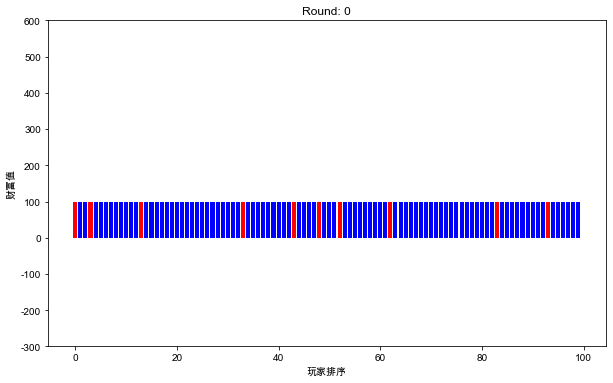

In [102]:
# 动态查看每一轮游戏之后的财富分布变化
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize = (10, 6))

def draw_bar(r):
    ax.clear()
    print(f"Round: {r}")
    plt.title(f"Round: {r}")
    plt.ylim(-300, 600)
    plt.xlabel('玩家排序')
    plt.ylabel('财富值')
    show_df = result_df[result_df['round'] == r][players].T.reset_index()
    show_df.columns = ['player', 'money']
    # 更努力的10个人的颜色设置为红色，其他人的颜色为蓝色
    show_df['color'] = show_df['player'].apply(lambda x: 'red' if x in luckier_players else 'blue')

    # 按照财富从小到大排序
    show_df.sort_values(by='money', ascending=True, inplace=True)  
    show_df.reset_index(drop=True, inplace=True)
    plt.bar(show_df.index, show_df.money, color=show_df.color)

ani = FuncAnimation(fig, draw_bar, frames=range(0, round, 100))  # 创建动画效果
# fps=5, 每秒播放5帧，数字越大，帧率越高，播放速度越快
ani.save('test3.gif', writer='imagemagick', fps=10, dpi=100)

结论：
1. 社会财富的总体分布形态没有什么变化
2. 10位努力玩家中多位都进入了富人top20！